# Análise Fatorial Exploratória

### Import libs

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact
import numpy as np

#Stats and ml libs
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer

# Settings
from sklearn import set_config
set_config(transform_output = 'pandas')

### Read Data

Estou utilizando a base de dados World Energy Consumption que encontrei no [Kaggle](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption)

* Após alguns testes, fiz a seleção de 55 colunas de forma que atenda os pressupostos

**Pressupostos da Análise Fatorial**
* Variáveis correlacionadas;
* Uso apenas de variáveis quantitativas contínuas;
* Existência de mais observações que variáveis;
* Dados sem outliers.

In [23]:
# Read csv file
df = pd.read_csv('Data/World Energy Consumption.csv')

#Drop columns 
df.drop("other_renewable_exc_biofuel_electricity", axis = 1, inplace= True)

# Select data
df = df.iloc[:,list(np.arange(36,91))].copy()
df.head()

,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,...,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Como o objetivo principal desse estudo é explorar a análise fatorial exploratórial (AFE), não me aterei a efetuar um tratamento de dados minucioso, utilizando de alternativas simples e pouco indicadas no uso real.** 

In [26]:
df.shape

(17432, 55)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
other_renewable_electricity,6084.0,5.158606,30.998008,0.000,0.00000,0.0110,0.67000,702.888
renewables_electricity,6084.0,64.331314,340.491017,0.000,0.08375,2.7855,17.42575,7492.505
solar_electricity,6119.0,1.701370,21.100053,0.000,0.00000,0.0000,0.00900,844.386
wind_electricity,6119.0,5.217070,48.966752,0.000,0.00000,0.0000,0.04700,1590.189
energy_per_gdp,6900.0,1.838233,1.570968,0.050,0.84175,1.3945,2.34500,13.493
energy_per_capita,9035.0,29602.526450,75226.270234,0.000,3102.61450,13776.7170,36713.59500,1676609.704
fossil_cons_change_pct,4201.0,3.371886,11.958375,-52.574,-0.86600,2.6270,6.41200,492.819
fossil_share_energy,4284.0,87.055670,14.866718,17.162,81.79225,92.1655,97.95125,100.000
fossil_cons_change_twh,4201.0,48.272569,309.766281,-2147.294,-1.48700,5.4020,27.43100,5477.970
fossil_fuel_consumption,4284.0,2737.591594,11071.914988,0.855,121.40500,296.3295,1068.12325,136761.607


In [3]:
# Replacing NaN values
df = df.replace(np.NaN, 0)

* Efetuei a padronização dos dados, porem em um uso real é indicado tratar os outliers para garantir que os resultados são confiáveis  

In [4]:
# Preprocessing data
preprocessing = StandardScaler()
df_scaled = pd.DataFrame(preprocessing.fit_transform(df.select_dtypes(float)), columns=df.select_dtypes(float).columns)
df_scaled.head()

,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,...,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec
0,-0.097448,-0.110353,-0.047676,-0.062898,-0.544633,-0.273307,-0.13444,-0.560091,-0.075815,-0.119855,...,-0.142854,-0.511865,-0.062244,-0.145144,-0.231054,-0.366722,-0.168322,-0.134132,-0.081849,-0.23363
1,-0.097448,-0.110353,-0.047676,-0.062898,-0.544633,-0.273307,-0.13444,-0.560091,-0.075815,-0.119855,...,-0.142854,-0.511865,-0.062244,-0.145144,-0.231054,-0.366722,-0.168322,-0.134132,-0.081849,-0.23363
2,-0.097448,-0.110353,-0.047676,-0.062898,-0.544633,-0.273307,-0.13444,-0.560091,-0.075815,-0.119855,...,-0.142854,-0.511865,-0.062244,-0.145144,-0.231054,-0.366722,-0.168322,-0.134132,-0.081849,-0.23363
3,-0.097448,-0.110353,-0.047676,-0.062898,-0.544633,-0.273307,-0.13444,-0.560091,-0.075815,-0.119855,...,-0.142854,-0.511865,-0.062244,-0.145144,-0.231054,-0.366722,-0.168322,-0.134132,-0.081849,-0.23363
4,-0.097448,-0.110353,-0.047676,-0.062898,-0.544633,-0.273307,-0.13444,-0.560091,-0.075815,-0.119855,...,-0.142854,-0.511865,-0.062244,-0.145144,-0.231054,-0.366722,-0.168322,-0.134132,-0.081849,-0.23363


### Pressuposto 1: Correlação entre variáveis

Um dos pressupostos é a correlação entre as variáveis. No entanto, gerar o tradicional plot de mapa de calor com as correlações lineares, à medida que aumenta a quantidade de variáveis do dataset utilizado, pode torná-lo praticamente inútil para análises e visualizações eficazes.

In [27]:
df_scaled.corr()

,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,...,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec
other_renewable_electricity,1.000000,0.958534,0.749237,0.872707,0.010132,0.032040,-0.000408,0.119755,0.396199,0.755364,...,-0.002051,0.080663,0.263413,0.743377,0.000920,0.077049,0.616673,-0.008462,0.036186,0.086371
renewables_electricity,0.958534,1.000000,0.708376,0.819729,0.024020,0.028369,0.004953,0.118452,0.451821,0.791100,...,0.004599,0.074325,0.307406,0.789805,-0.005584,0.064873,0.672132,-0.006824,0.018614,0.052539
solar_electricity,0.749237,0.708376,1.000000,0.937650,-0.014829,0.007804,-0.003633,0.045875,0.150890,0.359926,...,-0.001063,0.024944,0.128237,0.356360,-0.003475,0.019971,0.283695,-0.004815,0.012768,0.037844
wind_electricity,0.872707,0.819729,0.937650,1.000000,-0.008621,0.017340,-0.003911,0.073116,0.225956,0.515641,...,-0.000839,0.042874,0.171008,0.491168,-0.005259,0.039655,0.401065,-0.005516,0.017378,0.046666
energy_per_gdp,0.010132,0.024020,-0.014829,-0.008621,1.000000,0.223427,0.089149,0.509893,0.060217,0.076479,...,0.094635,0.402573,0.048984,0.057713,-0.005086,0.402184,0.040642,0.025420,0.077666,0.026435
energy_per_capita,0.032040,0.028369,0.007804,0.017340,0.223427,1.000000,0.049665,0.224126,0.017222,0.051676,...,0.051044,0.174460,0.015614,0.047489,0.247204,0.352226,0.027943,0.110873,0.110495,0.046803
fossil_cons_change_pct,-0.000408,0.004953,-0.003633,-0.003911,0.089149,0.049665,1.000000,0.253978,0.104624,0.021313,...,0.563169,0.251510,0.099082,0.017602,-0.006287,0.137403,0.022506,0.170497,-0.003274,-0.010150
fossil_share_energy,0.119755,0.118452,0.045875,0.073116,0.509893,0.224126,0.253978,1.000000,0.138260,0.208564,...,0.269153,0.899178,0.114229,0.192484,0.019703,0.636703,0.144906,0.120542,0.048847,0.087233
fossil_cons_change_twh,0.396199,0.451821,0.150890,0.225956,0.060217,0.017222,0.104624,0.138260,1.000000,0.645720,...,0.116868,0.093614,0.826412,0.610885,-0.002687,0.055695,0.560700,-0.001277,-0.002006,0.001083
fossil_fuel_consumption,0.755364,0.791100,0.359926,0.515641,0.076479,0.051676,0.021313,0.208564,0.645720,1.000000,...,0.022675,0.141680,0.470265,0.953575,-0.001197,0.127998,0.841026,-0.005338,0.010246,0.021617


Para garantir que este pressuposto esta sendo atendido irei utilizar o teste estátistico de **Esfericidade de Bartlett**.

* A hipótese nula é que as variáveis não são correlacionadas

Para realizar esse teste em Python usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando !pip install factor_analyzer.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`

In [7]:
# Calculate bartlett sphericity and save p_values
p_value = calculate_bartlett_sphericity(df_scaled)[1]


# print test results 
print(F'p_value: {p_value}')

p_value: 0.0


Considerando um nível de significância de 5% e rejeitaremos a hipótese nula devido ao resultado do p_value ser menor do que 0.05, ou seja consideramos que há correlação entre todas as variáveis.

### Pressuposto 2: Adequacidade da amostra

A medida de adequacidade da amostra de Kaiser-Meyer-Olkin (KMO) compara as magnitudes dos coeficientes de correlação observados com as magnitudes dos coeficientes de correlação parcial.

A KMO é um valor que varia entre 0 e 1, e seu cálculo leva em consideração a inter-relação das variáveis presentes no conjunto de dados. Uma KMO próxima a 1 indica que as correlações entre as variáveis são grandes e, portanto, são adequadas para a análise fatorial. Por outro lado, uma KMO próxima a 0 sugere que as correlações são pequenas, o que torna a análise fatorial inadequada para o conjunto de dados.

In [8]:
# Calculate KMO and save results
kmo_value = calculate_kmo(df_scaled)[1]

# print results
print(f'KMO: {kmo_value}')

KMO: 0.6736536222819834


c:\Users\aurel\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Como o valor de KMO é maior do que 0.5, podemos proceder com a análise fatorial, porém é importante observar que quanto maior esse valor, maior será a confiabilidade dos resultados obtidos.

### Modeling

Agora que sabemos que a análise fatorial é adequada para ser usada em nosso caso, vamos realizar os seguintes passos:

* Encontrar a quantidade ideal de fatores;

* Rotacionar os fatores para facilitar suas interpretações.


Para encontrar a quantidade de fatores, vamos olhar para os autovalores da matriz cargas fatoriais. Se o autovalor for maior que 1 então consideramos aquele fator como relevante.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe FactorAnalyzer, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

[1.29831956e+01 7.61748896e+00 4.76870798e+00 3.10916593e+00
 2.71090493e+00 2.20643130e+00 1.88010439e+00 1.67273621e+00
 1.41180884e+00 1.15797592e+00 1.15166666e+00 1.09715310e+00
 1.06155253e+00 1.01913102e+00 1.00224963e+00 9.85016447e-01
 9.06514990e-01 8.78487283e-01 8.17883492e-01 7.41240097e-01
 7.09296551e-01 6.43417245e-01 5.49493624e-01 5.34202932e-01
 4.49569921e-01 3.89973083e-01 3.52784274e-01 2.91897308e-01
 2.88475372e-01 2.70618247e-01 1.73350786e-01 1.65373208e-01
 1.46326670e-01 1.34414914e-01 1.02911011e-01 9.45091079e-02
 8.70796348e-02 8.05118596e-02 7.19020530e-02 6.46543478e-02
 5.14091130e-02 4.66489484e-02 2.98087046e-02 2.16019841e-02
 1.63813885e-02 1.26365790e-02 1.05863630e-02 1.03100263e-02
 8.15152218e-03 6.65352226e-03 2.74838799e-03 1.60560824e-03
 6.76051114e-04 3.88504500e-04 2.15846247e-04]


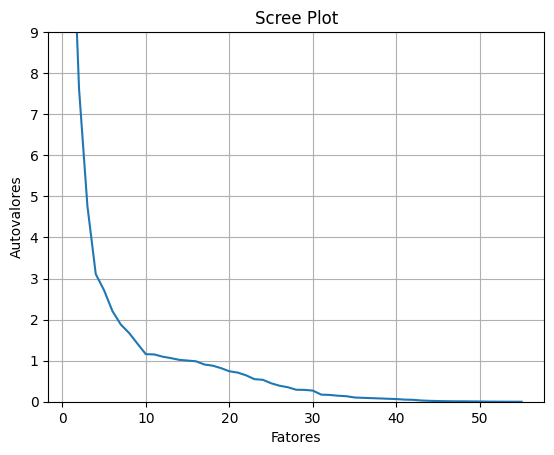

In [9]:
# training model
model = FactorAnalyzer(rotation = None)
model.fit(df_scaled)

# get eigenvalues for evaluate n factors
ev, v = model.get_eigenvalues()

# Showing result in lineplot
print(ev)
sns.lineplot(x=range(1, df_scaled.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.ylim(0,9)
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid()
plt.show()

Utilizando o gráfico Scree Plot podemos observar que é adequado a utilização até 13 fatores pois possuem um autovalor superior a 1.

* Decidi então por utilizar 11 fatores 

Podemos também calcular a variância explicada por cada fator e a variância explicada cumulativa.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realização da análise fatorial.

In [37]:
# criando um objeto para fazer análise fatorial com 4 fatores
model = FactorAnalyzer(n_factors=11, rotation=None)

# aplicando a análise fatorial aos dados
model.fit(df_scaled)

# criando nome para as colunas do DataFrame de cargas fatoriais
colunas = []
for i in range(11):
  colunas.append('Fator ' + str(i+1))

# criando DataFrame para auxiliar a visualização do resultado
variancia_fator = pd.DataFrame(model.get_factor_variance(),
                               index=['Variância','Variância Proporcional','Variância Acumulada'],
                               columns=colunas)

variancia_fator

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Fator 11
Variância,12.876739,7.439135,4.497151,2.969003,2.456664,2.020877,1.651009,1.437312,1.068755,0.930198,0.791425
Variância Proporcional,0.234123,0.135257,0.081766,0.053982,0.044667,0.036743,0.030018,0.026133,0.019432,0.016913,0.014390
Variância Acumulada,0.234123,0.369380,0.451146,0.505128,0.549794,0.586538,0.616556,0.642689,0.662121,0.679034,0.693423


Observando a variância acumulada, podemos afirmar que 11 fatores explicam aproximadamente 69% da variância total dos dados.

### Comunalidades

Comunalidade representa a proporção da variância de uma variável original que é explicada pelos fatores latentes extraídos na análise fatorial.

Quando realizamos a análise fatorial, cada variável original é expressa em termos dos fatores latentes obtidos. A comunalidade de uma variável é a soma dos quadrados dos coeficientes de regressão que relacionam a variável aos fatores. Em outras palavras, é a proporção da variância da variável que é compartilhada ou explicada pelos fatores.

In [38]:
pd.DataFrame(model.get_communalities(),
             index=df_scaled.columns,
             columns=['Comunalidades'])

,Comunalidades
other_renewable_electricity,0.964362
renewables_electricity,0.942914
solar_electricity,0.852501
wind_electricity,0.988754
energy_per_gdp,0.281435
energy_per_capita,0.238713
fossil_cons_change_pct,0.198845
fossil_share_energy,0.927057
fossil_cons_change_twh,0.949529
fossil_fuel_consumption,0.966027


A comunalidade de uma variável pode variar de 0 a 1. Um valor de comunalidade próximo a 1 indica que a variável é bem representada pelos fatores e que a maior parte de sua variância é explicada pela estrutura comum dos dados. Por outro lado, uma comunalidade próxima a 0 indica que a variável não é bem representada pelos fatores e que a maioria de sua variância é específica da própria variável, não sendo compartilhada com os outros fatores.

A comunalidade é útil para avaliar a qualidade da extração de fatores e a adequação da análise fatorial aos dados. Quanto maior a comunalidade média de todas as variáveis, mais confiável é a representação dos dados pelos fatores extraídos. Além disso, a comunalidade também é relevante para determinar a interpretabilidade dos fatores, pois variáveis com comunalidade baixa podem não ser tão úteis para explicar a estrutura subjacente dos dados.

### Rotação

A rotação é um procedimento utilizado para facilitar a interpretação dos fatores extraídos. O objetivo da rotação é fazer com que os fatores sejam mais claramente identificáveis e interprestáveis.

Após a extração dos fatores, os mesmos são geralmente expressos em termos de combinações lineares das variáveis originais. Essas combinações podem ser complexas e difíceis de interpretar diretamente. A rotação dos fatores busca simplificar a estrutura dos fatores, fazendo com que eles se tornem mais "nítidos" e "organizados", ao mesmo tempo em que mantêm a mesma quantidade de variância dos dados.

### Utilizando uma função interativa para avaliar os diferentes tipos de rotação
* **Infelizmente  não é possivel vizulizar o output da célula seguinte no github**
  

In [21]:
# Create a list with all rotation tips
rotation = ['varimax',
            'promax', 
            'oblimin',
            'oblimax',
            'quartimin',
            'quartimax',
            'equamax',
            None]

# create interactive plot to avalliate all rotation
@interact(changed = rotation)
def model(changed):
    model = pd.DataFrame(FactorAnalyzer(n_factors=11, rotation = changed)\
                                       .fit(df_scaled)\
                                       .loadings_,
                         index=df_scaled.columns,
                         columns=colunas)
    
    # create a dict to save values above 0.5
    fatores_variaveis = {}

    # filling in the dict
    for i in range(11):
      fatores_variaveis['Fator ' + str(i+1)] = model[abs(model.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()    

    #Show plot and values dict
    #return sns.heatmap(model,vmin=-1, vmax=1, annot=False), fatores_variaveis
    return fatores_variaveis

interactive(children=(Dropdown(description='changed', options=('varimax', 'promax', 'oblimin', 'oblimax', 'qua…

* Selecionei a rotação varimax devido a explicabilidade dos fatores.

Essa técnica de rotação visa maximizar a variância dos coeficientes de cada variável em um único fator, o que leva a fatores mais claros e mais facilmente interpretáveis.

In [12]:
# Training model
model = FactorAnalyzer(n_factors=11, rotation = 'varimax')
model.fit(df_scaled)

# save results in dataframe
cargas_fat = pd.DataFrame(model.loadings_,
                          index=df_scaled.columns,
                          columns=colunas)

fatores_variaveis = {}
# preenchendo o dicionário
for i in range(11):
  fatores_variaveis['Fator ' + str(i+1)] = cargas_fat[abs(cargas_fat.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()  

fatores_variaveis

{'Fator 1': ['other_renewable_electricity',
  'renewables_electricity',
  'wind_electricity',
  'fossil_cons_change_twh',
  'fossil_fuel_consumption',
  'gas_cons_change_twh',
  'gas_consumption',
  'gas_production',
  'hydro_consumption',
  'low_carbon_electricity',
  'low_carbon_cons_change_twh',
  'low_carbon_consumption',
  'nuclear_consumption',
  'oil_consumption',
  'oil_production'],
 'Fator 2': ['hydro_share_energy',
  'hydro_elec_per_capita',
  'hydro_energy_per_capita',
  'low_carbon_elec_per_capita',
  'low_carbon_share_energy',
  'low_carbon_energy_per_capita',
  'other_renewables_elec_per_capita'],
 'Fator 3': ['nuclear_share_elec',
  'nuclear_share_energy',
  'nuclear_elec_per_capita',
  'nuclear_energy_per_capita'],
 'Fator 4': ['fossil_energy_per_capita',
  'fossil_cons_per_capita',
  'gas_share_energy',
  'gas_elec_per_capita',
  'gas_energy_per_capita',
  'gas_prod_per_capita',
  'oil_energy_per_capita'],
 'Fator 5': ['fossil_share_energy', 'oil_share_energy'],
 'Fat

### Output

Como a quantidade de variáveis é muito grande, transformei o output das variáveis explicativas da AFE em um dataframe para uma melhor visualização.

In [39]:
pd.DataFrame.from_dict([fatores_variaveis.get(f"Fator 2")]).T\
  .rename({0:"Fator 2"},axis = 1)

,Fator 2
0,hydro_share_energy
1,hydro_elec_per_capita
2,hydro_energy_per_capita
3,low_carbon_elec_per_capita
4,low_carbon_share_energy
5,low_carbon_energy_per_capita
6,other_renewables_elec_per_capita


Como podemos observar, o fator 2, por exemplo, poderia ser renomeado para "Geração Sustentável de Energia", assim simplificando o conjunto de dados e trazendo mais clareza e interpretabilidade para a análise. Ao atribuir um nome significativo aos fatores, conseguimos resumir as variáveis associadas a cada fator em uma única categoria temática, tornando mais fácil entender a essência do fator e sua relação com as variáveis originais. Essa abordagem é vantajosa para a comunicação dos resultados da análise fatorial, pois facilita a discussão e a compreensão dos padrões subjacentes nos dados relacionados à geração sustentável de energia. Além disso, ao nomear os fatores de forma informativa, estamos enriquecendo a interpretação da análise e tornando-a mais acessível para outros pesquisadores ou partes interessadas envolvidas no estudo

Para melhor análise dos fatores criei uma função interativa para percorrer cada Fator gerado pelo modelo

**Função interativa, output da célula não vizivel no Github**

In [40]:
@interact(fator = list(np.arange(1,12)))
def view(fator):
    return pd.DataFrame.from_dict([fatores_variaveis.get(f"Fator {fator}")]).T\
             .rename({0:f"Fator {fator}"},axis = 1)

interactive(children=(Dropdown(description='fator', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), value=1), Out…

### Ranqueamento

Embora não se aplique a este estudo em particular, é possível ranquear o conjunto de dados se tivermos algum rótulo ou ID que permita melhor compreensão dos dados. O ranqueamento pode ser útil para ordenar as observações de acordo com algum critério específico, o que pode facilitar a análise ou a interpretação dos resultados em algumas situações.

In [15]:
# Calculate racking results
weights = model.loadings_
matriz_df = np.asmatrix(df_scaled)
matriz_peso = np.asmatrix(weights)
mult_matriz = np.round(np.dot(matriz_df, matriz_peso),4)
variancia = model.get_factor_variance()[1]
resultado = np.round(np.dot(mult_matriz, variancia), 4)

resultado

array([-1.1365, -1.1365, -1.1365, ..., -0.6479, -0.631 , -0.6231])

In [42]:
# Create a copy dataframe with column factor rank
top = df.assign(Rancking_fator = resultado.tolist())\
               .sort_values(by = 'Rancking_fator', ascending = False)

In [43]:
top.head()

,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,...,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,Rancking_fator
17022,663.847,6712.063,572.908,1266.086,NaN,20975.203,2.486,84.846,3294.567,135807.237,...,33.225,613.605,53181.125,149.968,6969.007,52244.640,6846.287,86.992,2.597,90.0116
17023,682.877,7065.089,704.024,1416.947,NaN,21027.415,0.703,84.320,954.370,136761.607,...,33.059,438.800,53619.925,141.222,6951.468,52069.986,6750.529,88.531,2.637,87.5800
17021,622.176,6276.014,443.315,1135.069,NaN,20624.761,1.382,85.123,1806.839,132512.670,...,33.768,647.364,52567.520,148.510,6964.560,51013.260,6758.640,82.431,2.532,79.2038
17020,592.389,5900.412,329.564,958.942,1.429,20490.955,0.918,85.459,1189.562,130705.831,...,33.947,1028.180,51920.156,161.120,6956.056,50843.437,6811.802,79.366,2.476,76.2831
17014,406.001,4168.712,30.518,346.471,1.588,20204.963,4.714,86.574,5477.970,121691.136,...,34.211,1433.631,48087.136,151.770,6912.225,46251.552,6648.372,58.360,1.954,73.6692
